# 통계분석과 머신러닝

- 통계분석과 머신러닝의 차이
- 랜덤 넘버
- 정규 분포
- 가설 검정 (t-검정)
- 독립성 검정 (chi 제곱 검정)

## 통계분석과 머신러닝의 차이
- 통계의 목적은 데이터로부터 어떤 의미, 통찰력(insight)를 얻는 것이다 (확률, 평균치, 분산, 신뢰구간 등)
- 머신러닝은 예측, 분류 등을 수행하는 모델(소프트웨어)을 만드는 것이며, 이를 위해서 데이터를 보고 학습하는 방법을 사용한다

## 통계 유형
- 기술(descriptive) 통계
 - 데이터의 평균, 중위값, 표준편차, 확률 분포 등으로 현상을 설명한다. 시각화를 주로 이용한다.
 - 두 개 이상 변수에 대해서 상관관계 등을 본다. 관련성 분석.
- 추정(estimation)
 - 표본 샘플 데이터를 보고 모집단의 특성 (평균, 표준편차 등)을 추정하는 것
 - 평균, 표준편차 등 특정 수치 값을 추정하는 점추정과, 신뢰구간을 추청하는 구간 추정이 있다
- 가설 검정 (testing hypothesis)
 - 샘플 데이터를 보고, 주장하고자 하는 대립가설(alternative hypothesis)이 맞는지를 검정(testing)하는 것
 - 대립가설이 맞지 않다는 영(null) 가설이 얼마나 확률적으로 발생 가능한지를 보고 발생확률이 매우 낮으면 영가설이 기각하고 대립가설을 채택한다
 - 검정은 증명(proof)은 아님! 확률을 제시하는 것임.

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.19.png?raw=1" width=250 align='left'>

- 확률
 - 확률이란 어떤 사건이 일어날 가능성을 말한다. 즉, 샘플(표본)이 어떻게 발생할지를 예상하는 것
 - 수식 계산으로 구할 수도 있고 실험으로 구할 수도 있다
 - 주사위 각 눈금이 나올 확률은 1/6: 공리(axiom) 확률

# 랜덤 넘버
- 데이터 분석에는 랜덤 넘버를 자주 사용한다
- 랜덤 넘버를 사용하는 이유는 불확실한 모든 가능한 경우를 실험적으로 커버할 수 있기 때문이다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 다양한 시각화 도구 패키지
import seaborn as sns

## 랜덤 넘버를 이용한 파이($\pi$) 구하기
- 컴퓨터가 생성하는 랜덤 넘버가 0~1 사이에서 균등하게, 랜덤하게 발생하는 성질을 이용
- 랜덤 넘버를 2개씩 발생시켜 2차원 좌표값을 얻고, 이 위치가 원 내부에 들어가는 경우와 사각형 내에 들어가는 경우의 비율로부터 파이를 구한다
 - 반지름이 1인 원의 면적은 $\pi$ 이다

(0, 1)

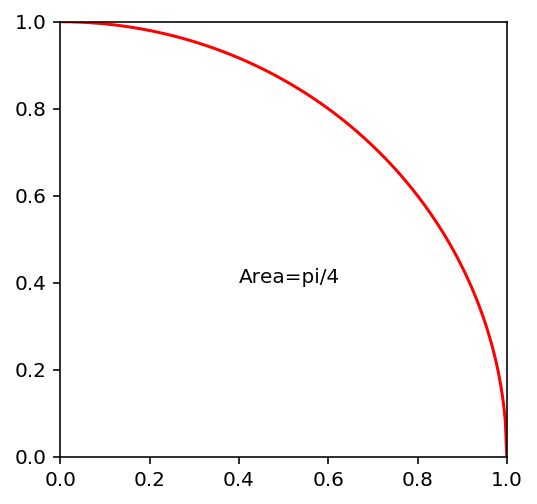

In [3]:
plt.figure(figsize=(4,4)) 
xs=np.linspace(0,1, 300) 
plt.plot(xs, (1-xs**2)**0.5, c='r')
plt.text(0.4, 0.4, "Area=pi/4")
plt.xlim(0,1)
plt.ylim(0,1)

In [4]:
# 0~1 사이의 랜덤 넘버 얻기 (rand 함수 사용)
N = 10
x = np.random.rand(N)
x

array([0.18299412, 0.85413074, 0.53672383, 0.84937706, 0.03209758,
       0.57534573, 0.89018331, 0.03143988, 0.14793769, 0.40537171])

In [5]:
x < 0.5

array([ True, False, False, False,  True, False, False,  True,  True,
        True])

In [6]:
(x < 0.5).mean()

0.5

In [7]:
# 시뮬레이션으로 원 내부에 들어간 샘플 수와 사각형 내의 샘플 수의 비율로부터 파이를 구한다
# 특정 공간에 랜덤하게 점이 찍힐 확률은 면적 크기에 비례한다는 가정을 사용
N = 10000
x = np.random.rand(N)
y = np.random.rand(N) 
pi = ((x**2 + y**2) < 1).mean()*4 
pi

3.1348

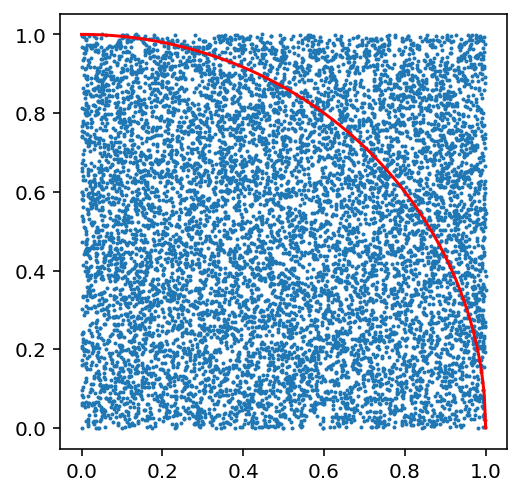

In [8]:
# 실험 내용 시각화
plt.figure(figsize=(4,4)) 
plt.scatter(x,y,s=1) 
xs=np.linspace(0,1,300) 
plt.plot(xs, (1-xs**2)**0.5, c='r') # 원 그리기 (붉은색)

# 정규 분포
- 종(bell) 모양의 확률 분포
- 자연에서 여러 번 누적된 샘플의 확률 분포는 정규(normal) 분포를 따른다는 특징이 있다
- 예: 주사위를 동시에 여러 개 던진 경우 합의 분포는 정규분포를 따른다
 - 키, 몸무게 등 자연적으로 누적되는 값은 정규분포를 따르는 것이 많다

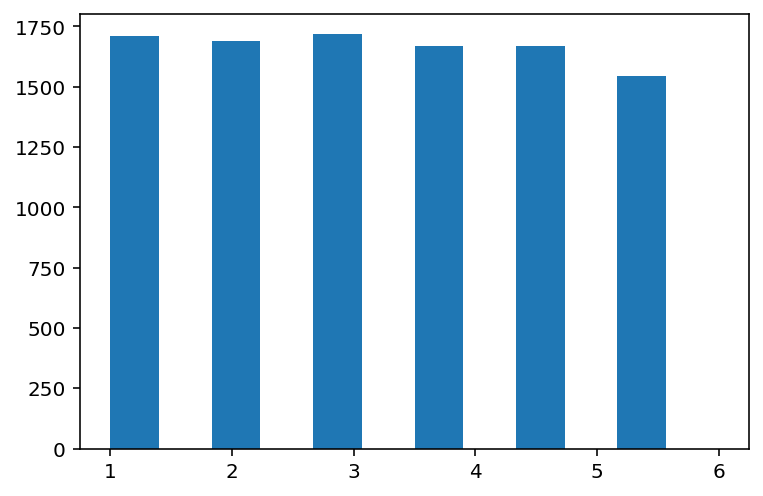

In [9]:
# 주사위 하나를 던질 때 나오는 값의 확률 분포: 균일 (uniform) 분포
N = 10000
x = np.random.randint(1,7, N) 

plt.hist(x, bins = 6, width=0.4) 
plt.show()

## 누적 샘플의 확률 분포
- 주사위를 동시에 여러 개 던져서 나오는 값의 합의 분포

In [10]:
n_multiple = 2 # 주사위를 동시에 던져 합산할 주사위 수

# 총 N번 시행한 경우 빈도수를 그리는 함수 정의
def show_dices(n_multiple, N=100000):
    sum = 0
    for i in range(n_multiple):
        x = np.random.randint(1,7,N) 
        sum = sum + x
    plt.hist(sum, bins = n_multiple*5+1, width=0.7) 
    # 주사위를 1, 2, 3개 던질 때 나오는 숫자 경우의 수는 6, 11, 16, 21, ... (5*n+1)
    plt.show()

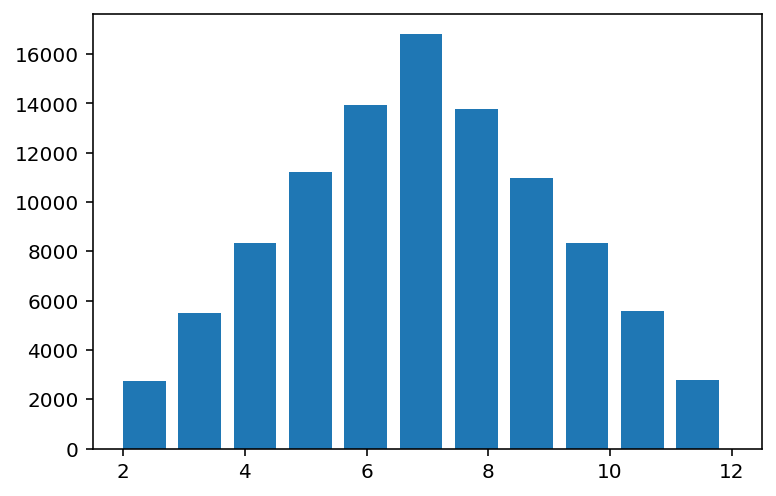

In [11]:
# 주사위를 2개 던질 때의 분포
show_dices(2)

### 주사위 두 개 합의 확률 분포
- 컨볼류션으로 구할 수 있다 (한 확률 분포는 고정하고 다른 분포 함수를 슬라이딩하면서 겹치는 면적을 구한다)
- 상수(uniform, 0차원) 함수의 적분은 1차 함수가 된다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.59.15.png?raw=1" width=500 align='left'>

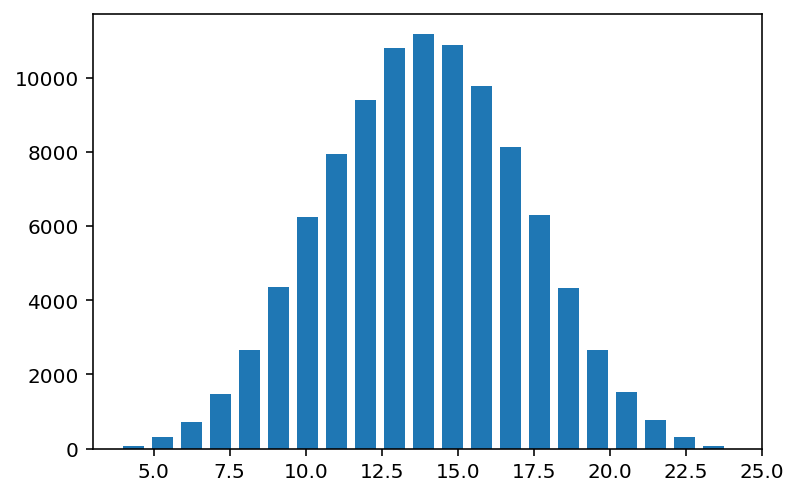

In [12]:
# 2개씩 던지는 것을 2회 더하는 경우, 즉 4개 주사위 값의 합의 분포
show_dices(4)

### 주사위 4 개의 합의 확률 분포
- 1차 함수의 적분은 2차 함수가 된다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.59.01.png?raw=1" width=500 align='left'>

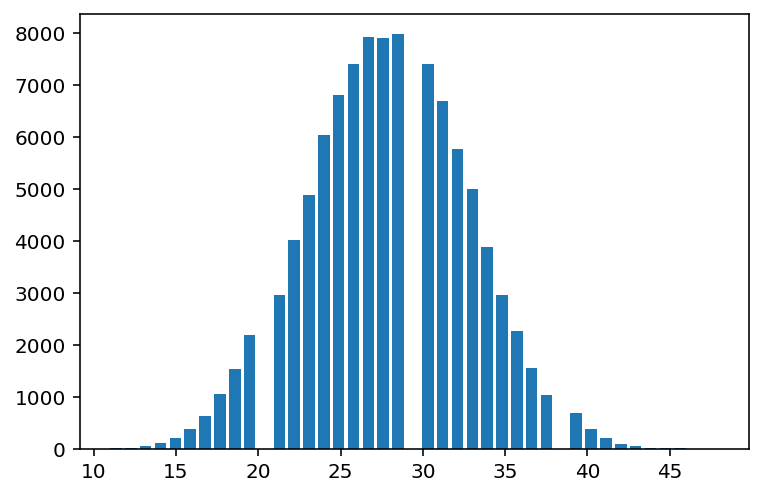

In [13]:
# 4개씩 던지는 것을 2번 더하는 경우, 즉 8개 주사위 값의 합의 분포
show_dices(8)

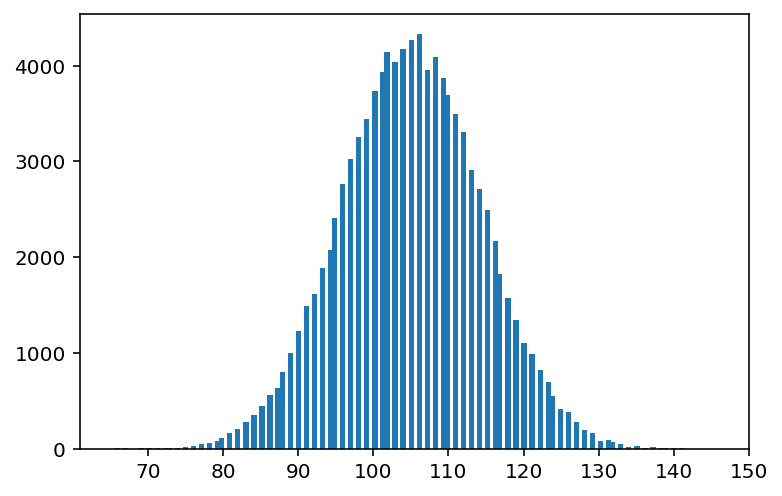

In [14]:
# 주사위 30개의 합의 확률 분포
show_dices(30)

### 이를 계속하면 정규 분포에 도달한다
- 확률 분포 2개의 컨볼류션 결과가 더 이상 바뀌지 않는 확률 분포를 정규분포라고 한다
- Central Limit Theorm

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.10.23.png?raw=1" width=500 align='left'>

- 정규분포 식 

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.13.50.png?raw=1" width=160 align='left'>

- 정규분포를 갖는 랜덤 넘버 발생, randn

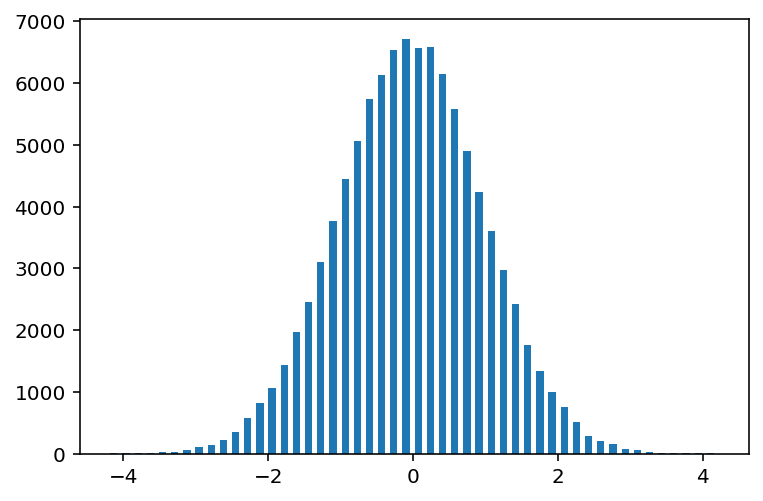

In [15]:
# 평균이 0, 표준편차가 1인 정규분포 랜덤 넘버 얻기 (randn)
x = np.random.randn(100000)
plt.hist(x, bins=50, width=0.1)
plt.show()

## 정규분포의 특징
- 자연계에 가장 많이 발생
- 어떤 샘플의 확률분포가 정규분포를 따른다면 이의 평균, 분산, 신뢰구간 등의 예측이 수월해진다
- 추정 통계 분석에 유용

# 검정 통계
- 어떤 가설이 맞는지를 검정하는 것 (가설 검정: testing hypothesis)
 - 데이터를 보고, 주장하고 싶은 대립가설이 맞는지를 검정(testing)하는 것
 - 대립가설이 맞지 않다는 영(null) 가설이 얼마나 확률적으로 발생 가능한지를 보고 발생확률이 매우 낮으면 영가설이 기각하고 대립가설을 채택한다

## 독립비교 t 검정
- independence t_test
- 두 개의 샘플이 동일한 모집단에서 추출된 것인지를 검정하는 것 (정규 분포를 가정하고 두 표본의 평균의 차이를 검정)
- ttest_ind 함수를 사용하여 p-value 가 0.05 이하이면 우연히 발생했다고 보기 어렵다고 판단
 - 즉, 영가설을 기각하고 대립가설을 채택한다
 
### 정상 주사위와 비정상 주사위
- 주사위 눈금이 6이 나오지 않고 1~5만 나오는 횟수가 몇 번 이상이면 일반 주사위 던지기가 아니라고 할 것인가?

In [16]:
# 정상적인 주사위 던지기의 발생 패턴 (18회 시행)
np.random.randint(1,7,18)

array([1, 5, 3, 4, 6, 2, 4, 6, 1, 5, 3, 1, 1, 5, 6, 2, 5, 6])

In [17]:
# 정상적인 주사위를 10000번 던진 것의 분포와 60번 던졌는데 6이 한번도 나오지 않은 경우 t검정
from scipy import stats
stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,60))

Ttest_indResult(statistic=2.7800771557590194, pvalue=0.005444697436312776)

In [18]:
# 6이 연속해서 나오지 않는 횟수를 바꾸어 본다
stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,120))[1].round(5)

0.09296

### 동전의 한쪽 면이 몇 번 연속 발생하면 특이한가
- 일반적으로는 0, 1이 비슷하게 발생한다
- 계속 0이 발생하는 횟수가 몇 번이면 정상이 아니라고 판단하는가? 즉, 대립 가설을 채택하는가?

In [19]:
# 정상적인 0, 1 패턴 10000번과, 10회 연속 0만 나오는 패턴이 같은 모집단의 샘플 추출이라고 볼 수 있는가?
stats.ttest_ind(np.random.randint(0,2,10000), 
                np.random.randint(0,1,10))[1].round(5)

0.00165

### 키의 평균치가 다른지를 검정
- 두 집단의 (키)의 샘플수, 평균치, 분산 수를 바꾸어 본다
- 한 집단의 키의 평균치만 170으로 고정함

In [20]:
def ttest_height(n,dev,mean):
    return stats.ttest_ind(np.random.randn(n)*dev +170, 
                np.random.randn(n)*dev + mean)[1]

In [21]:
ttest_height(30, 4, 170)

0.12383824528503155

In [22]:
# p-value의 평균치를 구하기 위해서 p-value 를 100회 구하여 평균을 취한다
def ttest_h_average(n,dev,mean):
    sum = 0
    for i in range(100):
        sum = sum + stats.ttest_ind(np.random.randn(n)*dev +170, 
                np.random.randn(n)*dev + mean)[1]
    return (sum/100.0).round(5)

In [23]:
ttest_h_average(30, 4, 170)

0.47402

In [24]:
ttest_h_average(30, 4, 175)

0.00031

In [25]:
ttest_h_average(300, 4, 171)

0.02292

In [26]:
ttest_h_average(300, 4, 171.5)

0.00074

In [27]:
ttest_h_average(300, 6, 171)

0.13516

## 카이제곱 검정
- 독립성 검정 (test for independence)
- 두 개의 사건에서 얻은 샘플이 독립적인지(무관한지) 아니면 관계가 있는지를 검정하는 것
 - 예, 마케팅에서 A/B 테스트가 의미있는 결과를 냈는지를 검정
- chi2_contingency 함수를 사용하여 p-value가 0.05 이하이면 우연히 발생했다고 보기 어렵다고 본다. 즉, A/B 테스트가 효과가 있었다는 대립 가설을 채택한다

### A/B 테스트의 차이가 없는 경우
- 상품 구매 결과가 채널 A/B에 관계 없이 랜덤한 경우

In [28]:
# 400회의 A/B 테스트 결과 (각각 200회 시행)
N = 200
ab = ["A"]*N + ["B"]*N

# 구매 결과를 랜덤하게 생성
purchase = np.random.choice([0,1], N*2)
df_ab = pd.DataFrame({"채널":ab, "구매":purchase})
df_ab

,채널,구매
0,A,1
1,A,0
2,A,1
3,A,0
4,A,0
...,...,...
395,B,0
396,B,0
397,B,0
398,B,0


In [29]:
# 교차 집계 테이블
df = pd.crosstab(df_ab['채널'], df_ab['구매'])
df

구매,0,1
채널,,
A,102,98
B,91,109


In [30]:
# 카이제곱 검정
# p-value가 0.05 이상이면, A/B 테스트는 차이가 없다는 영가설을 채택한다
_,p,_,_ = stats.chi2_contingency(df, correction=False)
p.round(5)

0.27104

### A/B 테스트의 차이가 있는 경우
- 즉, 상품 구매율이 채널 A/B에 따라 다른 경우

In [31]:
# A 채널이면 평균 60%가 구매하고, B 채널이면 평균 45% 구매했다고 가정

p1 = np.random.choice([0,1], N, p=[0.4, 0.6])
p2 = np.random.choice([0,1], N, p=[0.55, 0.45])

purchase = np.concatenate((p1,p2))
# purchase = np.random.choice([0,1], N*2) # 랜덤하게 구매한 경우 
df_ab = pd.DataFrame({"채널":ab, "구매":purchase})
df = pd.crosstab(df_ab['채널'], df_ab['구매'])
print(df)
_,p,_,_ = stats.chi2_contingency(df, correction=False)
p.round(5)

구매    0    1
채널          
A    74  126
B   122   78


0.0

- p-value가 0.05 이하이면 두 채널 A/B는 유의미한 차이가 있다고 본다

# 통계분석과 머신러닝
- 통계학에서는 이론적인 근거를 설명하는 것을 중요시 한다. 가설, 확률, 신뢰구간, 오차범위 등을 다룬다
- 머신러닝은 이론적인 근거 제시보다는 예측이나 분류를 잘 수행하는 소프트웨어 모델을 만드는 것을 목표로 한다
- 분석할 데이터의 량이 적으면 통계적 분석에 의존하여 '설명'을 해야 하나, 데이터가 충분히 많으면 머신러닝 모델을 만들어 실전에서 동작하는 모델을 만드는 것이 더 유용하다